In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import theano
import theano.tensor as T
import cPickle as pickle
import os
load_path = '../../final_saved/boston/basic_cv/'
data_path = '../../../data/boston'
from plot_style import init_rc_params
init_rc_params()

Using gpu device 0: GeForce 820M (CNMeM is disabled, cuDNN not available)


heatmap

In [3]:
results = []
for f in os.listdir(load_path):
    with open(os.path.join(load_path, f), 'rb') as inp:
        data = pickle.load(inp)
        results.append((data['lr'], data['validation'][-1]))
print results

[(1e-06, -13.265041571723089), (2.4999999999999998e-06, -19.070807834201389), (5e-05, -13.901045328776043), (1e-05, -14.249528164333769), (4.9999999999999996e-06, -11.885784166124131), (2.5e-05, -11.938517998589409)]


convergence

In [5]:
with open(os.path.join(load_path, '5e-06.pckl')) as inp:
    data = pickle.load(inp)
optima = data['params'][-1]
convs = [[] for _ in range(len(optima))]
for i in xrange(len(optima)):
    for p in data['params']:
        convs[i].append(np.linalg.norm(p[i]-optima[i]))
    plt.plot(convs[i])

TypeError: unsupported operand type(s) for -: 'CudaNdarray' and 'CudaNdarray'

stability (noise in data)

0.0 43.9389 7.21303
0.1 48.0696 5.89645
0.2 86.1279 23.9731
0.3 139.404 34.4377
0.4 216.36 61.7059
0.5 316.923 99.1999
0.6 571.205 175.183
0.7 559.08 161.033
0.8 988.487 318.811
0.9 1181.43 357.594
1.0 1425.95 476.094
1.1 1932.4 523.926
1.2 2189.84 721.173
1.3 2922.38 755.43
1.4 2772.86 723.778
1.5 4006.85 1264.78
1.6 4708.06 1267.74
1.7 5025.77 828.248
1.8 6150.03 1308.68
1.9 6496.43 1292.04


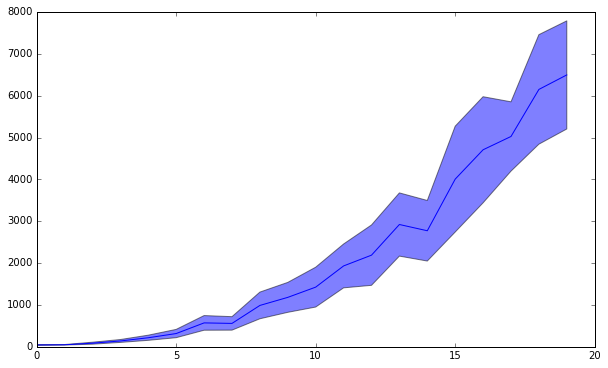

In [8]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))
with open(os.path.join(load_path, '5e-06.pckl')) as inp:
    data = pickle.load(inp)
if len(data['params'])==10**4:
    params = data['params'][-1]
else:
    params = data['params'][-6]
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.nnet.relu(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.mean((output.T - Y)**2)
monitor = theano.function([X,Y,param], cost, allow_input_downcast=True)
results =[]
results_std = []
for noise_level in range(0,20):
    result = []
    noise = noise_level*1.0/10
    for p in params:
        result.append(monitor(test_x + np.random.randn(test_x.shape[0],test_x.shape[1])*noise, test_y, p))
    results.append(np.mean(result))
    results_std.append(np.std(result))
    print noise, results[-1], results_std[-1]
results = np.array(results)
results_std = np.array(results_std)
plt.fill_between(range(len(results)), results-results_std, results+results_std, alpha=0.5)
plt.plot(range(len(results)), results)


stability (noise in params)

In [11]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))
with open(os.path.join(load_path, '5e-06.pckl')) as inp:
    data = pickle.load(inp)
params = data['params'][-1]
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.nnet.relu(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.mean((output.T - Y)**2)
monitor = theano.function([X,Y,param], cost, allow_input_downcast=True)
results =[]
results_std = []
for noise_level in range(0,20):
    result = []
    noise = noise_level*1.0/10
    for p in params:
        p = np.as
        result.append(monitor(test_x, test_y, p  + np.random.randn(p.shape[0])*noise))
    results.append(np.mean(result))
    results_std.append(np.std(result))
    print noise, results[-1], results_std[-1]
results = np.array(results)
results_std = np.array(results_std)
plt.fill_between(range(len(results)), results-results_std, results+results_std, alpha=0.5)
plt.plot(range(len(results)), results)


TypeError: need a CudaNdarray on right

learning curve

0
50
100
150
200
250
max 2658.03291016
min 176544.739063


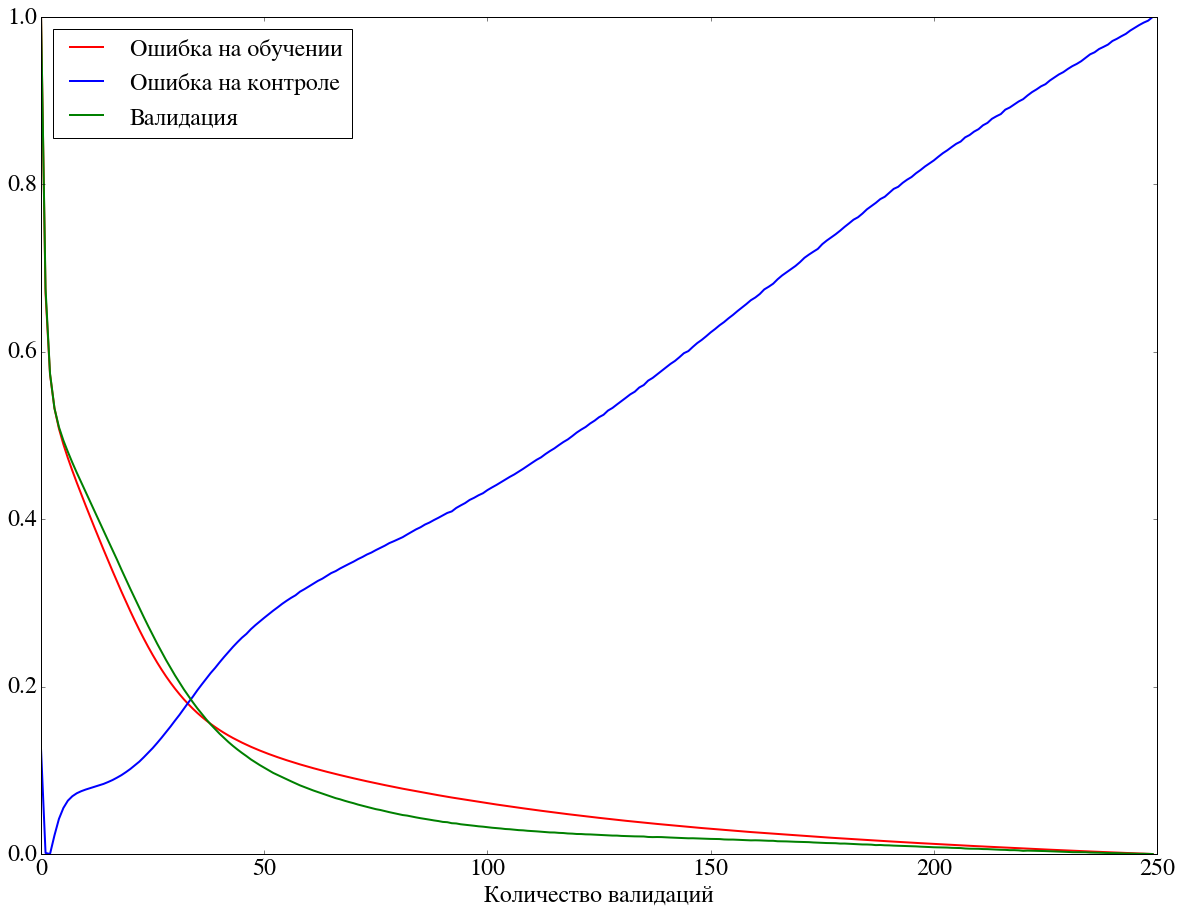

In [23]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))

train_x = np.load(os.path.join(data_path, 'train_x.npy'))
train_y = np.load(os.path.join(data_path, 'train_y.npy'))
results_train, results_test, results_validation = [],[],[]
with open(os.path.join(load_path, '5e-06.pckl')) as inp:
    data = pickle.load(inp)
all_params = data['params']
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.log(1 + T.exp(T.dot(X, W1)+b1))
output = T.dot(hidden, W2) + b2
cost = T.sum((output.T - Y)**2)*train_x.shape[0]/X.shape[0]
monitor = theano.function([X,Y,param], cost,allow_input_downcast=True)
results =[]
results_std = []
for i,params in enumerate(all_params):
    if i%50==0:
        print i 
    result_train = []
    result_test = []    
    for p in params:
        result_train.append( monitor(train_x, train_y, p))
        result_test.append(monitor(test_x, test_y, p))
        result_validation = data['validation'][i]
    results_train.append(np.mean(result_train))
    results_test.append((np.mean(result_test)))
    results_validation.append(result_validation)
    
    #print result_validation
min_ = np.min([results_train, results_test])
max_ = np.max([results_train, results_test])
print 'max', min_
print 'min', max_
results_train = np.array(results_train[1:])
results_test = np.array(results_test[1:])
results_validation = -np.array(results_validation[1:])
results_train = (results_train - np.min(results_train)) / ((np.max(results_train) - np.min(results_train)))
results_test = (results_test - np.min(results_test)) / ((np.max(results_test) - np.min(results_test)))
results_validation = (results_validation - np.min(results_validation)) / ((np.max(results_validation) - np.min(results_validation)))
plt.plot(results_train,'r', label= u'Ошибка на обучении')
plt.plot(results_test,'b', label=u'Ошибка на контроле')
plt.plot(results_validation, 'g', label=u'Валидация')
plt.legend(loc='best')
plt.xlabel(u'Количество валидаций', fontsize=24)


In [ ]:
test_x = np.load(os.path.join(data_path, 'test_x.npy'))
test_y = np.load(os.path.join(data_path, 'test_y.npy'))

train_x = np.load(os.path.join(data_path, 'train_x.npy'))
train_y = np.load(os.path.join(data_path, 'train_y.npy'))

results_train, results_test, results_validation = [],[],[]
with open(os.path.join(load_path, '1e-05.pckl')) as inp:
    data = pickle.load(inp)
all_params = data['params']
param = T.vector()
hidden_num = 50
X = T.matrix()
Y = T.vector()
W1 = param[:test_x.shape[1]*hidden_num].reshape((test_x.shape[1],hidden_num))
b1 = param[-hidden_num-1:-1]
W2 = param[test_x.shape[1]*hidden_num:test_x.shape[1]*hidden_num+hidden_num*1].reshape((hidden_num, 1))
b2 = param[-1:]
hidden = T.tanh(T.dot(X, W1)+b1)
output = T.dot(hidden, W2) + b2
cost = T.sum((output.T - Y)**2)*train_x.shape[0]/X.shape[0]
monitor = theano.function([X,Y,param], cost)
results =[]
results_std = []
for i,params in enumerate(all_params):
    if i%50==0:
        print i 
    result_train = []
    result_test = []    
    for p in params:
        result_train.append( monitor(train_x, train_y, p))
        result_test.append(monitor(test_x, test_y, p))
        result_validation = data['validation'][i]
    results_train.append(np.mean(result_train))
    results_test.append((np.mean(result_test)))
    results_validation.append(result_validation)
#plt.plot(results_train)
#plt.plot(results_test)
results_validation = np.array(results_validation)
results_validation = (results_validation-np.min(results_validation))/(np.max(results_validation) - np.min(results_validation))
print results_validation
results_validation = results_validation*np.mean([result_test, result_train])
plt.plot(results_validation)
